In [1]:
import csv
import glob
import sys, os
import xlrd
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.font_manager import _rebuild; _rebuild()
%matplotlib inline 
import seaborn as sns
from matplotlib.lines import Line2D

os.environ['KMP_DUPLICATE_LIB_OK']='True'
sys.path.append(os.path.join(os.path.abspath(os.getcwd()),".."))
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

# plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'lines.markeredgewidth': 1})
%matplotlib inline 
import seaborn as sns
from matplotlib.lines import Line2D
matplotlib.rcParams['text.usetex'] = True
matplotlib.rc('font',family='serif', serif=['Palatino'])
sns.set_style('white')

pgf_with_rc_fonts = {"pgf.texsystem": "pdflatex"}
matplotlib.rcParams.update(pgf_with_rc_fonts)

In [2]:
# get ordered list of files & user ids
survey_files = glob.glob(parent_dir + '/data/surveys/User_?.xlsx') + glob.glob(parent_dir + '/data/surveys/User_??.xlsx')
user_ids = []
for file in survey_files:
    user_id = int(re.search('User_([0-9][0-9]?)', file).group(1))
    user_ids.append(user_id)

In [4]:
# extract information needed

deltas = []
Questions = []

list_of_rows = []
for file, user_id in zip(survey_files, user_ids):
    wb = xlrd.open_workbook(file)

    # load individual sheets
    for method in range(3):
        sheet = wb.sheet_by_index(method)
        array = np.array([[sheet.cell_value(r, c) for c in range(sheet.ncols)] for r in range(sheet.nrows)])

        # extract relevant information
        task1 = array[7:13,:]
        task1_values = []
        for i in range(task1.shape[0]):
            task1_values.append(list(task1[i,:]).index("x"))
        task2a = array[16:22,:]
        task2a_values = []
        for i in range(task2a.shape[0]):
            task2a_values.append(list(task2a[i,:]).index("x"))
        task2b = array[25:31,:]
        task2b_values = []
        for i in range(task2b.shape[0]):
            task2b_values.append(list(task2b[i,:]).index("x"))
        if method == 2:
            task3a = array[34:40,:]
            task3a_values = []
            for i in range(task3a.shape[0]):
                task3a_values.append(list(task3a[i,:]).index("x"))
            task3b = array[43:49,:]
            task3b_values = []
            for i in range(task3b.shape[0]):
                task3b_values.append(list(task3b[i,:]).index("x"))

        # put together as a list
        list_of_rows.append([str(user_id), str(method), "1"] + task1_values)
        list_of_rows.append([str(user_id), str(method), "2a"] + task2a_values)
        list_of_rows.append([str(user_id), str(method), "2b"] + task2b_values)
        if method == 2:
            list_of_rows.append([str(user_id), str(method), "3a"] + task3a_values)
            list_of_rows.append([str(user_id), str(method), "3b"] + task3b_values)


In [5]:
# create a df and safe as csv
df = pd.DataFrame(list_of_rows,
                  columns=['ID', 'method', 'task'] + ['Q'+str(i) for i in range(1,7)])
df.to_csv(parent_dir + '/data/surveys/summary.csv', index=False)

# Visualize stuff

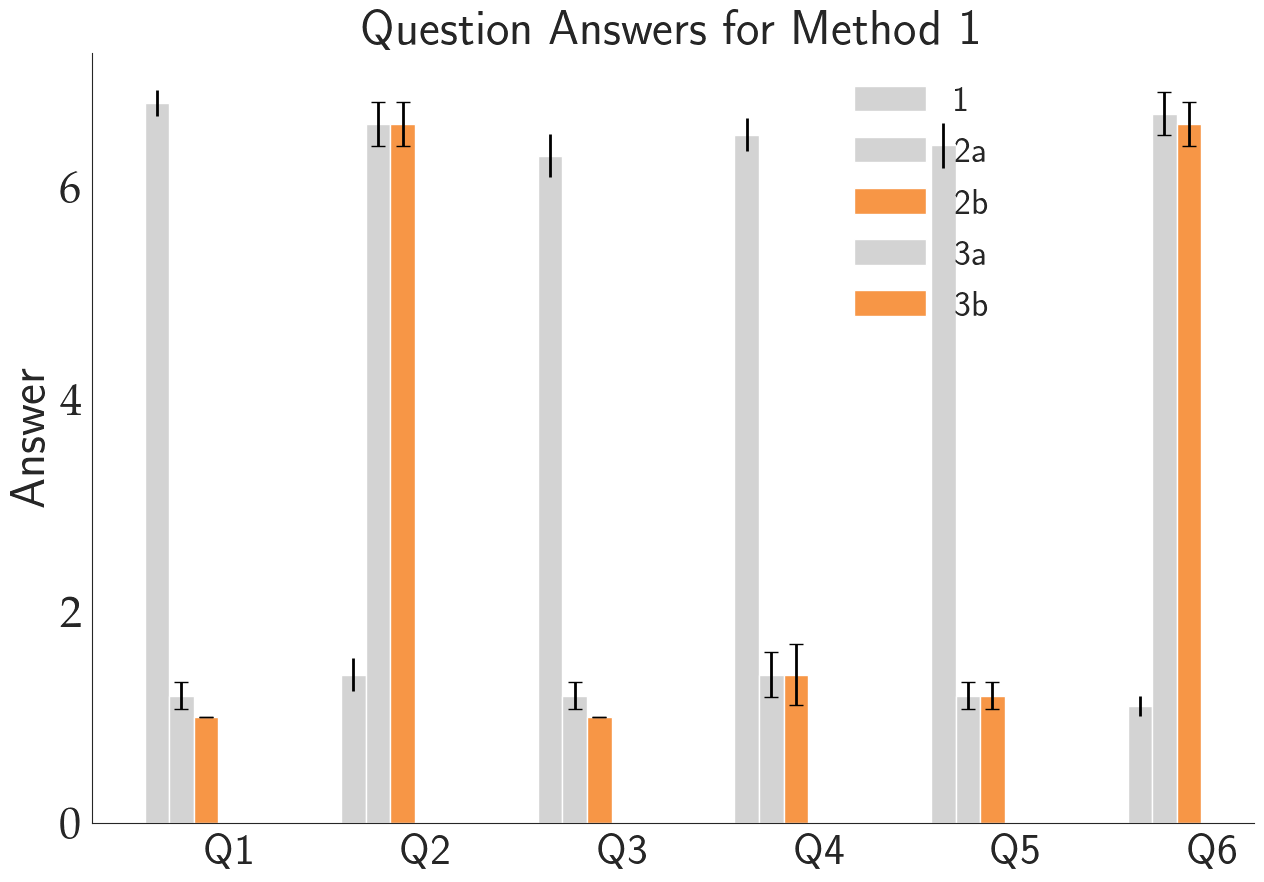

<Figure size 640x480 with 0 Axes>

In [8]:
# def bar_plot(df):
# Plot the pstar
fig = plt.figure(figsize=(15,10))
matplotlib.rcParams.update({'font.size': 36})
plt.rcParams['xtick.labelsize']=36
plt.rcParams['ytick.labelsize']=36
Qs = ['Q'+str(i) for i in range(1,7)]

fontsize = 36
#     set_style()
After_color = '#f79646'
Before_color = '#D3D3D3'
#     GT_color = '#6283F7'
labels = ["1", "2a", "2b", "3a", "3b"]

# set width of bar
barWidth = 0.25

method = "1"

for i, Q in enumerate(Qs):

    # set height of bar
    df_m = df[df['method'] == method]
    bars1_mean = df_m[df_m['task'] == '1'][Q].mean()
    bars1_sem = np.std(df_m[df_m['task'] == '1'][Q]) / np.sqrt(len(df_m[df_m['task'] == '1'][Q]))
    bars2_mean = df_m[df_m['task'] == '2a'][Q].mean()
    bars2_sem = np.std(df_m[df_m['task'] == '2a'][Q]) / np.sqrt(len(df_m[df_m['task'] == '2a'][Q]))
    bars3_mean = df_m[df_m['task'] == '2b'][Q].mean()
    bars3_sem = np.std(df_m[df_m['task'] == '2b'][Q]) / np.sqrt(len(df_m[df_m['task'] == '2b'][Q]))
    bars4_mean = df_m[df_m['task'] == '3a'][Q].mean()
    bars4_sem = np.std(df_m[df_m['task'] == '3a'][Q]) / np.sqrt(len(df_m[df_m['task'] == '3a'][Q]))
    bars5_mean = df_m[df_m['task'] == '3b'][Q].mean()
    bars5_sem = np.std(df_m[df_m['task'] == '3b'][Q]) / np.sqrt(len(df_m[df_m['task'] == '3b'][Q]))


    # Set position of bar on X axis
    r1 = np.arange(i*8*barWidth, i*8*barWidth+1)
    r2 = [x + barWidth for x in r1]
    r3 = [x + 2*barWidth for x in r1]
    r4 = [x + 3*barWidth for x in r1]
    r5 = [x + 4*barWidth for x in r1]
    
    if i > 0:
        labels = [None]*len(Qs)
    # Make the plot
    plt.bar(r1, bars1_mean, yerr=bars1_sem, color=Before_color, width=barWidth,
            ecolor='black', error_kw=dict(elinewidth=2, capsize=0), label=labels[0])
    plt.bar(r2, bars2_mean, yerr=bars2_sem, color=Before_color, width=barWidth,
            ecolor='black', error_kw=dict(elinewidth=2, capsize=5), label=labels[1])
    plt.bar(r3, bars3_mean, yerr=bars3_sem, color=After_color, width=barWidth,
        ecolor='black', error_kw=dict(elinewidth=2, capsize=5), label=labels[2])
    plt.bar(r4, bars4_mean, yerr=bars4_sem, color=Before_color, width=barWidth,
        ecolor='black', error_kw=dict(elinewidth=2, capsize=5), label=labels[3])
    plt.bar(r5, bars5_mean, yerr=bars5_sem, color=After_color, width=barWidth,
        ecolor='black', error_kw=dict(elinewidth=2, capsize=5), label=labels[4])
#axs.plot([0,n_max],[1, 1],color=random_color, linestyle='dashed', linewidth=6)
# Add xticks on the middle of the group bars
#plt.xlabel('Experimental Case', fontsize=fontsize)
plt.ylabel('Answer', fontsize=fontsize)
plt.title("Question Answers for Method {}".format(method), fontsize=fontsize)
plt.setp(plt.xticks()[1], fontsize=32)
plt.setp(plt.yticks()[1], fontsize=32)
plt.xticks(np.arange(len(Qs))*8*barWidth+0.75, Qs)

# Create legend & Show graphic
plt.legend(fontsize=26, frameon=False,loc=1,bbox_to_anchor=(0.8, 1.0))#, mode="expand", ncol=3)
sns.despine(fig)
plt.show()
plt.savefig(parent_dir + '/data/images/UserStudyQual.pdf')

# Likert Plot for Paper

In [10]:
# from utils.PlotLikertOverConditions import *
import textwrap

def convert(to_convert, questions=True):
    list_of_questions = [[0]*8 for i in range(to_convert.shape[1])]
    # iterate over participants
    for idx in range(to_convert.shape[0]):
        # iterate over questions
        for j in range(to_convert.shape[1]):
            list_of_questions[j][int(to_convert.iloc[idx,j]-1)] += 1
    
    # add questions
    for j in range(to_convert.shape[1]):
        if questions or Questions[j] in Questions[-3:]:
            list_of_questions[j][-1] = Questions[j]
        else:
            list_of_questions[j][-1] = ''
            
    return list_of_questions

In [11]:
val_dict = {'very strongly disagree':1, 'strongly disagree':2,
            'disagree':3, 'neutral':4,
            'agree':5, 'strongly agree':6, 'very strongly agree':7}

In [38]:
before = df[df['task']==1].iloc[:,3:-3]
after = df[df['task']==2].iloc[:,3:]
before_df_raw = convert(before)
before_df = pd.DataFrame(before_df_raw,
                  columns=list(val_dict.keys()) + ['question'] )
after_df_raw = convert(after, questions=False)
after_df = pd.DataFrame(after_df_raw,
                  columns=list(val_dict.keys()) + ['question']  )

df_to_plot = pd.DataFrame(before_df_raw + after_df_raw,
             columns=list(val_dict.keys()) + ['question'])

In [41]:
# Some questions are rather long. To nicely display them in the 
# figure they need to be wrapped.
wrapper = textwrap.TextWrapper(width=35)
df_to_plot['question'] = df_to_plot['question'].apply(lambda x: wrapper.fill(x))

# define likert colors, since the default colors look terrible.
# Note that the first color is assigned to the 'invisible' column and is therefore white
likert_colors = ['darkred', 'indianred', 'lightcoral','gainsboro','cornflowerblue','mediumblue', 'darkblue']

# set the questions as the index for easier plotting later on
# (alternatively one could explicitly state in the plotting call which column to use for labeling)
# df_to_plot = df_to_plot.set_index('question')

# find out the middle value
# Note that this code is non-generic, and depends on the particular anchor points for the scale
middles = df_to_plot[["very strongly disagree", "strongly disagree", "disagree"]].sum(axis=1) + df_to_plot["neutral"]*.5

# define some margin (1.1) for the left hand side of the plot
longest = middles.max()*1.05

In [ ]:
full_y = np.arange(19).astype(float)
# shift slightly up
full_y[3:] =  full_y[3:]+0.5
y_norm = full_y[-np.arange(8)*2 -1]
idx_normal = np.arange(8)
y_hatch = full_y[-np.setdiff1d(np.arange(19), np.arange(8)*2) -1]
idx_hatched = np.arange(8,19)

white_left = (middles - longest).abs()

cumsum_to_plot = df_to_plot.iloc[:,:7].cumsum(axis=1)

In [ ]:
Q_with_p = ['for the proxemics feature.',
 'for the laptop feature.',
 'for the table feature.',
 'It was frustrating, stressful, or\nirritating to teach the robot the features.',
 'It was easy to teach the robot the feature.',
 'Teaching the feature was quick.',
 'It was mentally demanding to\nteach the robot the feature.',
 'I was successful at teaching\nthe robot the feature I wanted.',
 'I believe the robot has learned the correct\nfeature from the traces I provided.',
 'I understand how the traces influence\nwhat feature the robot learns.',
 'It was easy to think of what traces to\ngive to the robot to teach the feature.']
Q_with_p.insert(3, 'The robot correctly learned what I wanted')

In [ ]:
matplotlib.rcParams.update({'font.size': 36})

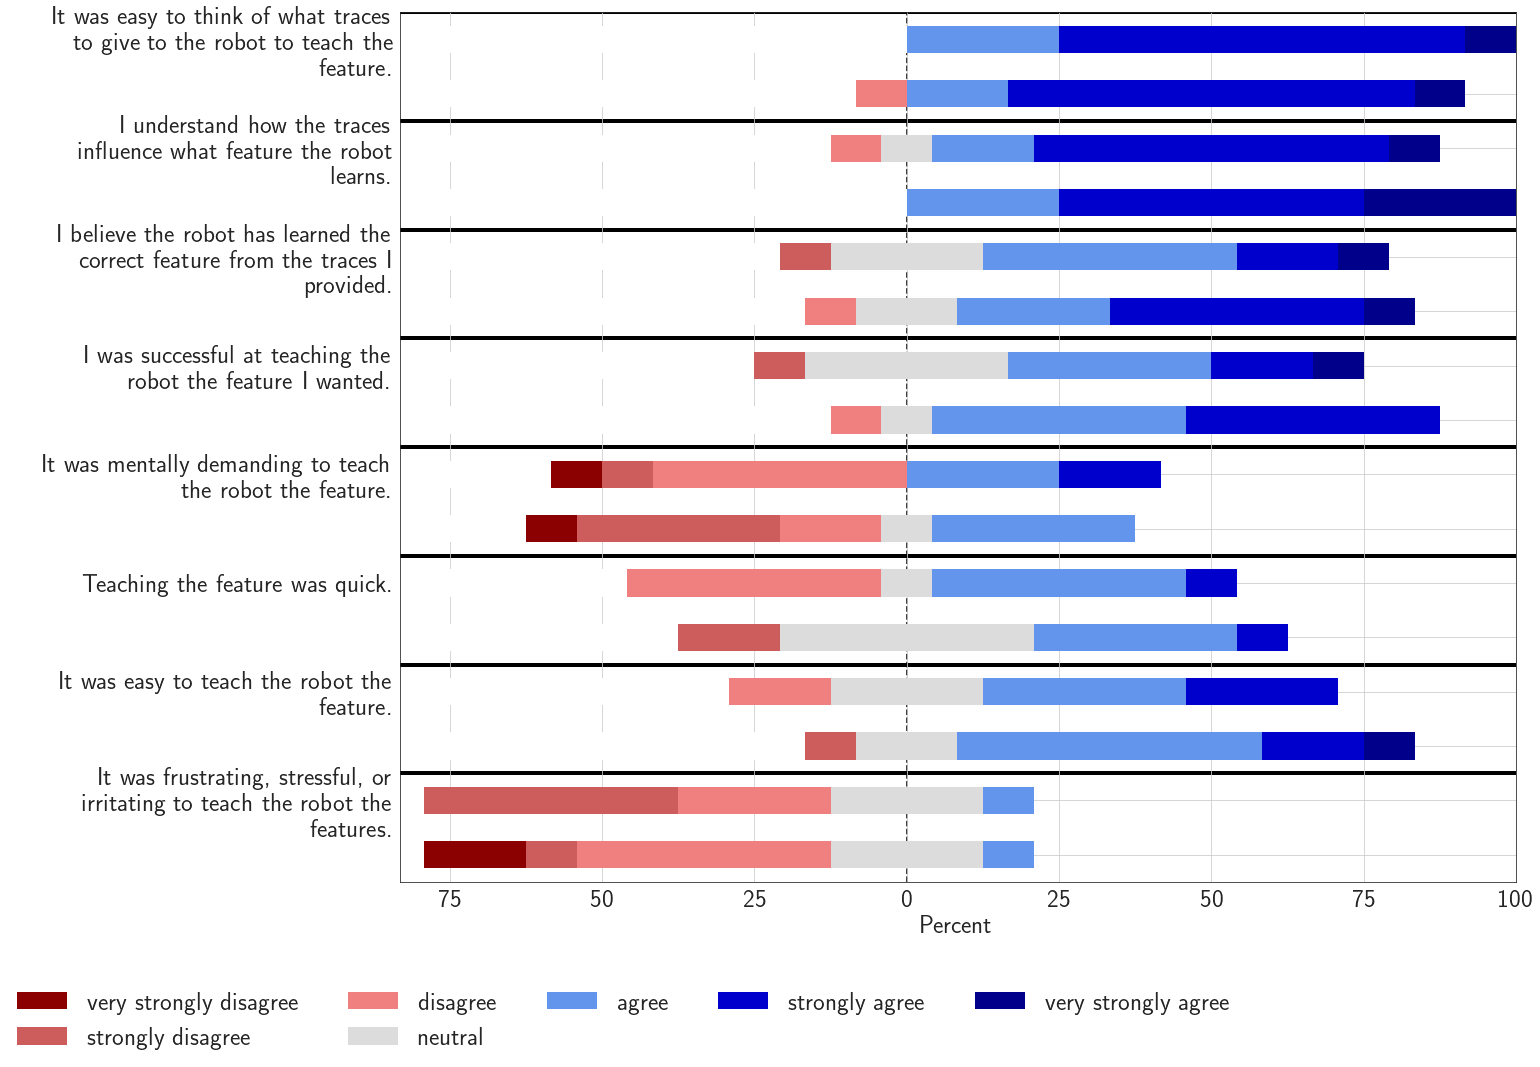

In [44]:
fig, ax = plt.subplots(1, figsize=(22, 20))

# plot the before bars
ax.barh(y=y_norm, width=df_to_plot.iloc[idx_normal,0], left = white_left[idx_normal], color=likert_colors[0])
for i in range(1,7):
    ax.barh(y=y_norm, width=df_to_plot.iloc[idx_normal,i],
             left = white_left[idx_normal] + cumsum_to_plot.iloc[idx_normal,i-1],
             color=likert_colors[i]
            )
    
# plot the after bars
ax.barh(y=y_hatch, width=df_to_plot.iloc[idx_hatched,0], left = white_left[idx_hatched],
        color=likert_colors[0], 
       hatch='/')
for i in range(1,7):
    ax.barh(y=y_hatch, width=df_to_plot.iloc[idx_hatched,i],
             left = white_left[idx_hatched] + cumsum_to_plot.iloc[idx_hatched,i-1],
             color=likert_colors[i],
             hatch='/'
            )
    
    
# plot a vertical dashed line at 0
z = ax.axvline(longest, linestyle='--', color='black', alpha=1)
# put this line at the background
z.set_zorder(-1)

# plot horizontal lies
for h in range(9):
    z = ax.axhline(3. + h*2, linewidth=4, linestyle='-', color='black', alpha=1)
    # put this line at the background
    z.set_zorder(-1)

# define some margin (1.05) for the right hand side of the plot
complete_longest = int(df_to_plot.sum(axis=1).max()*1.00) 
ax.set_xlim(0, complete_longest)
ax.set_ylim(-0.5, 19)

# create custom tick positions and labels in percent
xvalues = np.linspace(-9,12,8) + longest
xlabels = [str(i) + '\%' for i in [75, 50, 25, 0, 25, 50, 75, 100]]
for x in xvalues:
    # plot a vertical dashed line at 100
    z = ax.axvline(x, linestyle='--', color='black', alpha=.5)
    # put this line at the background
    z.set_zorder(-1)

ax.set_xticks(xvalues)
ax.set_xticklabels(xlabels)

ax.set_yticks([0, 1, 2, 2.75, 4, 6, 8, 10, 12, 14, 16, 18])
ax.set_yticklabels(Q_with_p)

# Shrink current axis's height by 10% on the bottom to make room for the legend
# box = ax.get_position()
# ax.set_position([box.x0, box.y0 + box.height * 0.1,
#                  box.width*0.9, box.height * 0.8])

# create the legend
handler, label = ax.get_legend_handles_labels()
ax.legend(
    handler, 
    label, 
    loc='upper center', 
    bbox_to_anchor=(0.2, -0.1), 
    ncol=5, 
    edgecolor='white',
    fontsize = 35,
    handlelength = 1
)

# set labels and title
# plt.xlabel('Percent')
ax.set_ylabel('')
# plt.grid(b=None)
plt.tight_layout()
plt.savefig(parent_dir + '/data/images/UserStudyQual_Table.pdf')
plt.show()

In [ ]:
# TODO
# hashed/shaded stuff
# Center questions
# Font larger
# change legend ordering (reds grey, lower blue)